In [1]:
from google.colab import drive
drive.mount('/gdrive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree,datasets,metrics,model_selection

data = datasets.load_iris()

X  = data.data
y = data.target

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [ ]:
#split the data into train and test
r = 0.4
Xtrain,Xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size = r,random_state = 5)

# create a decesion tree model
tree_model = tree.DecisionTreeClassifier(criterion='entropy',max_depth=None)

# train the model
tree_model = tree_model.fit(Xtrain,ytrain)

#predict the train data for training accuracy
ypredTrain = tree_model.predict(Xtrain)

# predict the test data for testing accuracy
ypredTest = tree_model.predict(Xtest)

# calculate the testing and training accuracy
accTrain = metrics.accuracy_score(ytrain,ypredTrain)
accTest = metrics.accuracy_score(ytest,ypredTest)

print('Training Accuracy:',accTrain)
print('Testing Accuracy:',accTest)

Training Accuracy: 1.0
Testing Accuracy: 0.95


In [ ]:
tree_model.feature_importances_ #

array([0.01931919, 0.03616553, 0.00972536, 0.93478993])

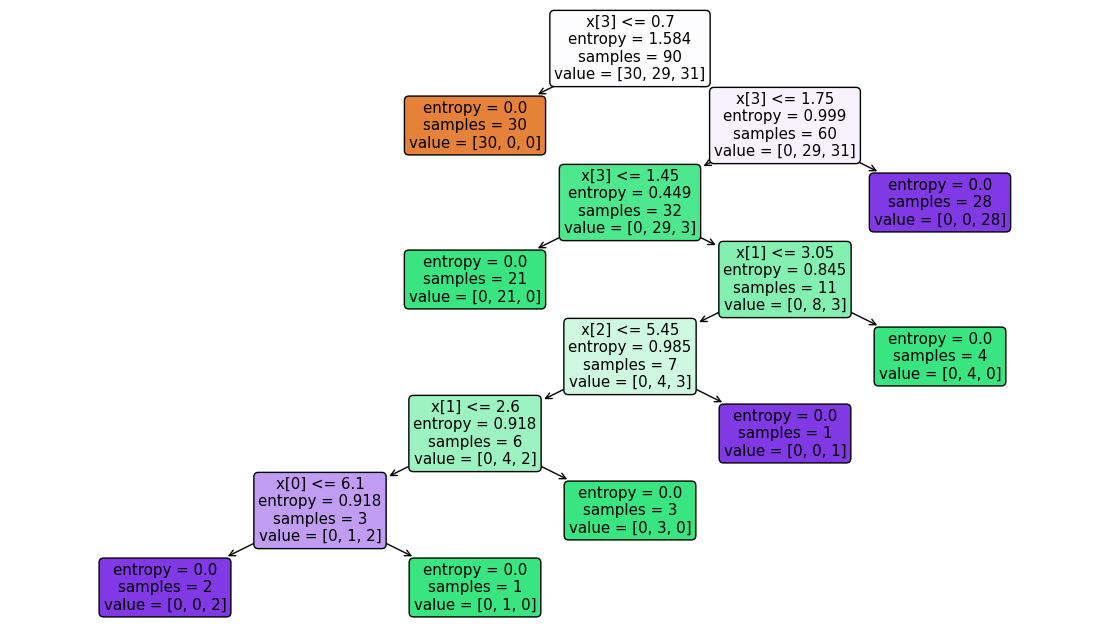

In [ ]:
plt.figure(1,figsize=(14,8))

tree.plot_tree(tree_model, filled=True, rounded=True)
plt.savefig('tree.png')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/diabetes.csv")
print(data.shape)
X = data.drop('Outcome',axis=1,inplace=False)
y= data['Outcome']

print(X.shape)
print(y.shape)
r = 0.4
Xtrain,Xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size = r,random_state = 5)
tree_model = tree.DecisionTreeClassifier(criterion='entropy',max_depth=None)
tree_model = tree_model.fit(Xtrain,ytrain)
ypredTrain = tree_model.predict(Xtrain)
ypredTest = tree_model.predict(Xtest)
accTrain = metrics.accuracy_score(ytrain,ypredTrain)
accTest = metrics.accuracy_score(ytest,ypredTest)
print('Training Accuracy:',accTrain)
print('Testing Accuracy:',accTest)

(768, 9)
(768, 8)
(768,)
Training Accuracy: 1.0
Testing Accuracy: 0.6883116883116883


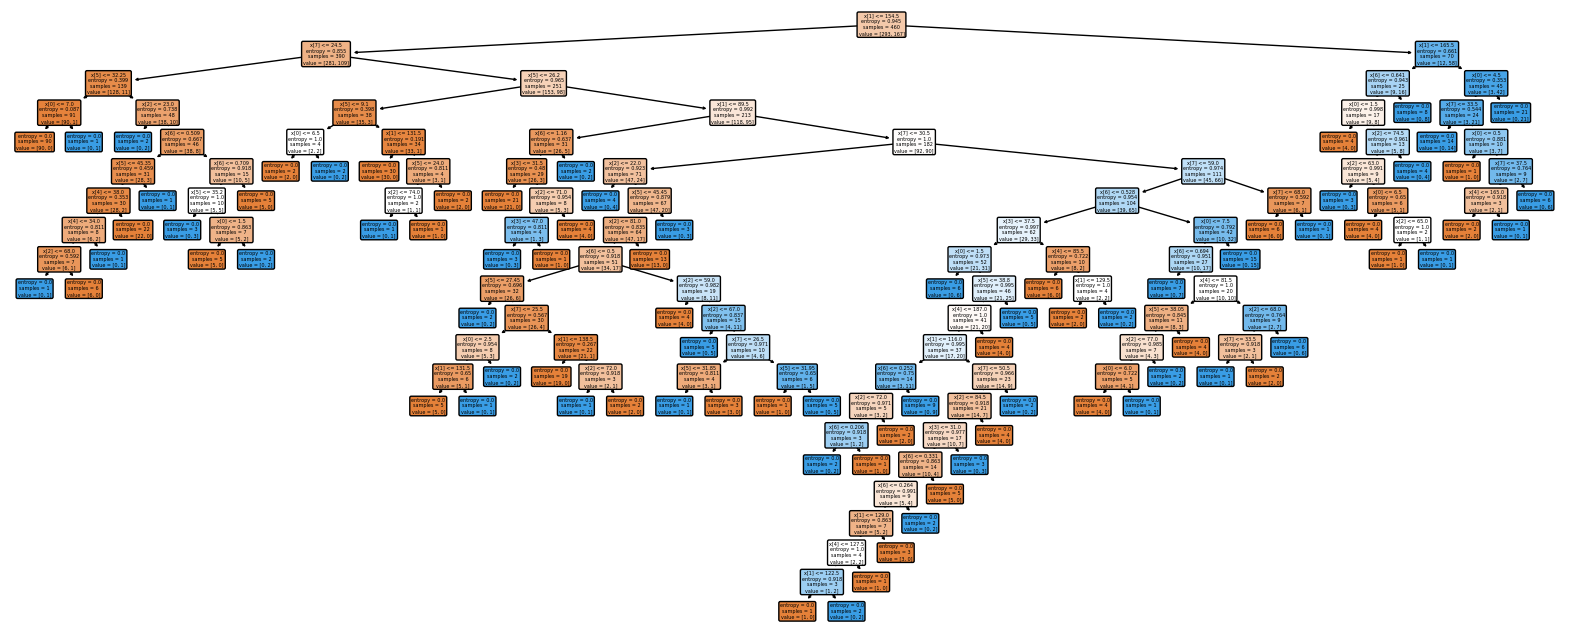

In [ ]:
plt.figure(2,figsize=(20,8))

tree.plot_tree(tree_model, filled=True, rounded=True)
plt.savefig('tree2.png')
plt.show()

In [ ]:
!unzip '/gdrive/MyDrive/Colab Notebooks/orl_face.zip' -d '/gdrive/MyDrive/Colab Notebooks/orlface'

Archive:  /gdrive/MyDrive/Colab Notebooks/orl_face.zip
   creating: /gdrive/MyDrive/Colab Notebooks/orlface/orl_face/
  inflating: /gdrive/MyDrive/Colab Notebooks/orlface/orl_face/.DS_Store  
   creating: /gdrive/MyDrive/Colab Notebooks/orlface/__MACOSX/
   creating: /gdrive/MyDrive/Colab Notebooks/orlface/__MACOSX/orl_face/
  inflating: /gdrive/MyDrive/Colab Notebooks/orlface/__MACOSX/orl_face/._.DS_Store  
   creating: /gdrive/MyDrive/Colab Notebooks/orlface/orl_face/u1/
  inflating: /gdrive/MyDrive/Colab Notebooks/orlface/orl_face/u1/1.png  
   creating: /gdrive/MyDrive/Colab Notebooks/orlface/__MACOSX/orl_face/u1/
  inflating: /gdrive/MyDrive/Colab Notebooks/orlface/__MACOSX/orl_face/u1/._1.png  
  inflating: /gdrive/MyDrive/Colab Notebooks/orlface/orl_face/u1/10.png  
  inflating: /gdrive/MyDrive/Colab Notebooks/orlface/orl_face/u1/2.png  
  inflating: /gdrive/MyDrive/Colab Notebooks/orlface/orl_face/u1/3.png  
  inflating: /gdrive/MyDrive/Colab Notebooks/orlface/orl_face/u1/4.png

<class 'numpy.ndarray'>
(112, 92)


(-0.5, 91.5, 111.5, -0.5)

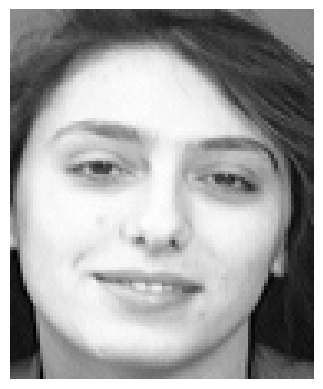

In [ ]:

import matplotlib.image as mimg
import matplotlib.pyplot as plt

# access any single image
usr_name = 8
samp_no = 5

path = "/gdrive/MyDrive/Colab Notebooks/orlface/orl_face/u%d/%d.png"%(usr_name,samp_no)

# read the image
im = mimg.imread(path)

print(type(im))
print(im.shape)

# display the image
plt.imshow(im,cmap='gray')
plt.axis('off')

In [ ]:
# convert the 2D-data of image into 1-D features
feat = im.reshape(1,-1)# shift all the values of the image
#into the columns in one single row
print(im.shape)
print(feat.shape)
print("range:",im.min(),'-',im.max())

(112, 92)
(1, 10304)
range: 0.0 - 0.81960785


In [ ]:
# logic to access all the samples of all
# the users
tot_samples = 400
data = np.zeros((tot_samples,im.shape[0]*im.shape[1]))
label = np.zeros((tot_samples))
images = np.zeros((tot_samples,im.shape[0],im.shape[1]))
indx=-1
for i in range(1,41,1): # to traverse users
  for j in range(1,11,1): # to traverse samples
    indx = indx+1
    # access any single image
    usr_name = i
    samp_no = j
    path = "/gdrive/MyDrive/Colab Notebooks/orlface/orl_face/u%d/%d.png"%(usr_name,samp_no)
    # read the image
    im = mimg.imread(path)
    feat = im.reshape(1,-1)
    data[indx,:]=feat
    label[indx]=i
    images[indx,:,:]=im
    print("user num ",i,'samp no',j,'processed...')

user num  1 samp no 1 processed...
user num  1 samp no 2 processed...
user num  1 samp no 3 processed...
user num  1 samp no 4 processed...
user num  1 samp no 5 processed...
user num  1 samp no 6 processed...
user num  1 samp no 7 processed...
user num  1 samp no 8 processed...
user num  1 samp no 9 processed...
user num  1 samp no 10 processed...
user num  2 samp no 1 processed...
user num  2 samp no 2 processed...
user num  2 samp no 3 processed...
user num  2 samp no 4 processed...
user num  2 samp no 5 processed...
user num  2 samp no 6 processed...
user num  2 samp no 7 processed...
user num  2 samp no 8 processed...
user num  2 samp no 9 processed...
user num  2 samp no 10 processed...
user num  3 samp no 1 processed...
user num  3 samp no 2 processed...
user num  3 samp no 3 processed...
user num  3 samp no 4 processed...
user num  3 samp no 5 processed...
user num  3 samp no 6 processed...
user num  3 samp no 7 processed...
user num  3 samp no 8 processed...
user num  3 samp n

(-0.5, 91.5, 111.5, -0.5)

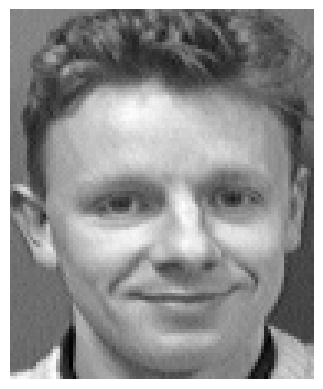

In [ ]:
# display the image
plt.imshow(images[200,:,:],cmap='gray')
plt.axis('off')

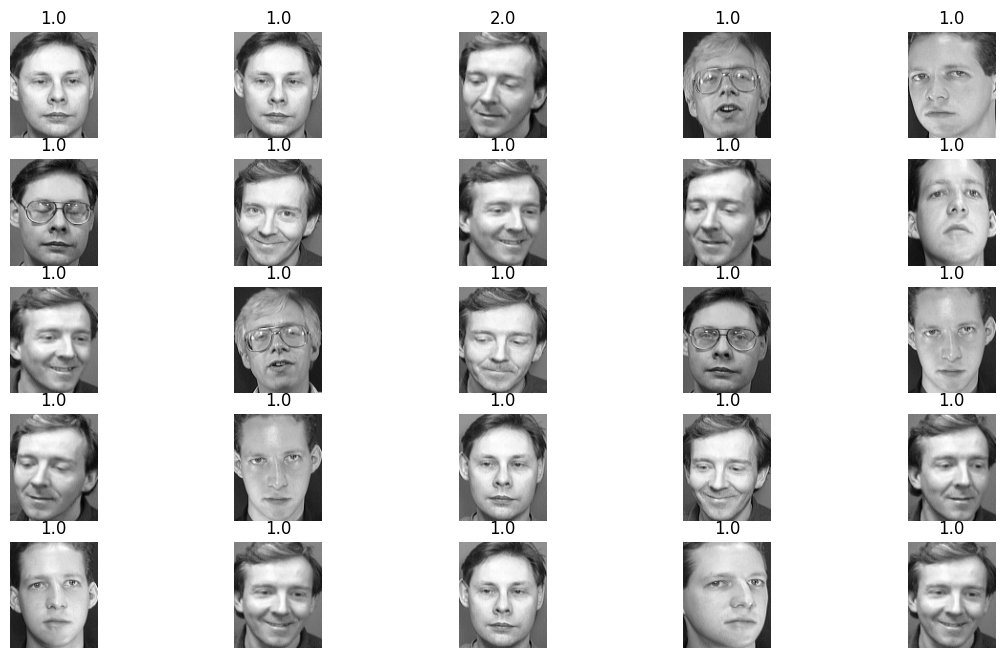

In [ ]:
import random

for i in range(1,26,1):
  usr_name = random.randint(1,40)
  samp_no = random.randint(1,10)
  path = "/gdrive/MyDrive/Colab Notebooks/orlface/orl_face/u%d/%d.png"%(usr_name,samp_no)
  plt.figure(1,figsize=(14,8))
  plt.subplot(5,5,i)
  plt.imshow(images[usr_name,:,:],cmap='gray')
  plt.axis('off')
  plt.title(label[samp_no])

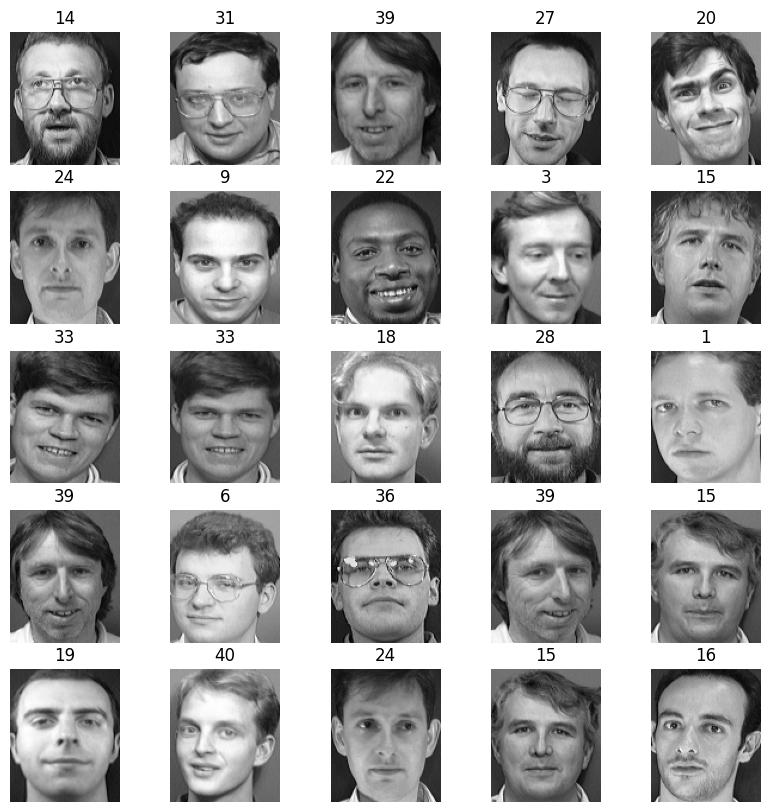

In [ ]:
ind=0
for i in range(5):
  for j in range(5):
    ind = ind+1
    s = np.random.randint(0,400)
    currIm = images[s,:,:]
    currId = label[s]
    plt.figure(1,(10,10))
    plt.subplot(5,5,ind)
    plt.imshow(currIm,cmap='gray')
    plt.title(str(int(currId)))
    plt.axis('off')



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print(data.shape)


(400, 10304)


In [ ]:
from sklearn import svm,model_selection,metrics
import pandas as pd
X = data.copy()
y = label.copy()


# split the data into 70:30 ratio
Xtrain,Xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size=0.3,random_state=5)
print(Xtrain.shape,ytrain.shape)
print(Xtest.shape,ytest.shape)

ker = ['poly','linear','rbf']
c_value = [1,2,3]

# pre allocation of the result variable
result = np.zeros((len(ker),len(c_value)))
for i in range(len(ker)):
  for j in range(len(c_value)):
    # create the svm classifier
    orl_svm_model = svm.SVC(kernel=ker[i],gamma='scale',C=c_value[j])

    # train the model
    orl_svm_model = orl_svm_model.fit(Xtrain,ytrain)

    # predict the labels
    ypred = orl_svm_model.predict(Xtest)

    # accuracy
    acc = metrics.accuracy_score(ypred,ytest)
    #print("accuracy:", acc)
    result[i,j]=acc
print(result)

ResultDF = pd.DataFrame(result,index=ker,columns=["C=1","C=2","C=3"])
ResultDF

(280, 10304) (280,)
(120, 10304) (120,)
[[0.94166667 0.94166667 0.94166667]
 [0.95       0.95       0.95      ]
 [0.88333333 0.95       0.95      ]]


,C=1,C=2,C=3
poly,0.941667,0.941667,0.941667
linear,0.950000,0.950000,0.950000
rbf,0.883333,0.950000,0.950000


In [ ]:
import joblib
# final best model
# kernel function - linear , C =1

orl_svm_model = svm.SVC(kernel='linear',gamma='scale',C=1)
# train the model
orl_svm_model = orl_svm_model.fit(Xtrain,ytrain)

# save the trained model
joblib.dump(orl_svm_model,'/gdrive/MyDrive/Colab Notebooks/orlface/orl_face/orl_face_model.pkl')

['/gdrive/MyDrive/Colab Notebooks/orlface/orl_face/orl_face_model.pkl']

<class 'numpy.ndarray'>
(512, 512, 3)


(-0.5, 511.5, 511.5, -0.5)

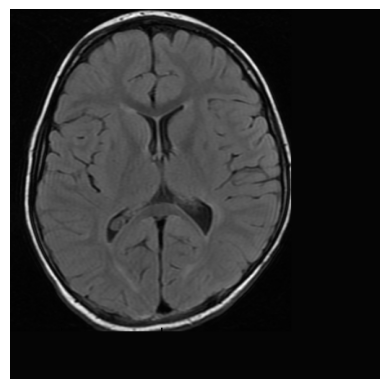

In [ ]:
import matplotlib.image as mimg
import matplotlib.pyplot as plt


sampno = 1
path = "/gdrive/MyDrive/Colab Notebooks/new_train/d(%d).png"%(sampno)

# read the image
im = mimg.imread(path)

print(type(im))
print(im.shape)

# display the image
plt.imshow(im,cmap='gray')
plt.axis('off')

In [ ]:
for i in range(1,62,1):

  path = "/gdrive/MyDrive/Colab Notebooks/new_train/d(%d).png"%(i)
    # read the image
  im = mimg.imread(path)

  print(type(im))
  print(im.shape)

  # display the image
  plt.imshow(im,cmap='gray')
  plt.axis('off')
  plt.title(i)
  plt.pause(1)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
for i in range(40,62,1):

  path = "/gdrive/MyDrive/Colab Notebooks/new_train/d(%d).png"%(i)
  import matplotlib.image as mimg
import matplotlib.pyplot as plt
import numpy as np

img_num=1
path = "/gdrive/MyDrive/Colab_Notebooks/Tumor/new_train/d(%d).png"%(img_num)

# read the image
im = mimg.imread(path)

print(type(im))
print(im.shape)


# logic to access all the samples of all
# the users
tot_samples = 60
data = np.zeros((tot_samples,im.shape[0]*im.shape[1]))
label = np.zeros((tot_samples))
images = np.zeros((tot_samples,im.shape[0],im.shape[1]))

for i in range(1,61,1): # to traverse users

    path = "/gdrive/MyDrive/Colab_Notebooks/Tumor/new_train/d(%d).png"%(i)
    # read the image
    im = mimg.imread(path)
    feat = im.reshape(1,-1)
    print(feat.shape)
    data[:,:]=feat
    # if i>40:
    #   label[i]=0
    # else:
    #   label[i]=1
    # images[i,:,:]=im
    # print("user num ",i,'processed...')